**Problem 4: Implement different preprocessing operations**

In [1]:
# Dataset: BMW Worldwide Sales Records (2010–2024)
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
file_path = '/content/drive/MyDrive/Data Science_Lab/bmw_sales_cleaned.csv'
sayem = pd.read_csv(file_path)

In [4]:
# Preview dataset
print("First 5 rows of dataset:")
display(sayem.head())

First 5 rows of dataset:


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Price_per_KM
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,0.650684
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,0.651092
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,10.305250
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,2.237057
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,0.408561


In [6]:
# Check for missing values
print("\n Missing Values Before Cleaning:")
print(sayem.isnull().sum())


 Missing Values Before Cleaning:
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
Price_per_KM            0
dtype: int64


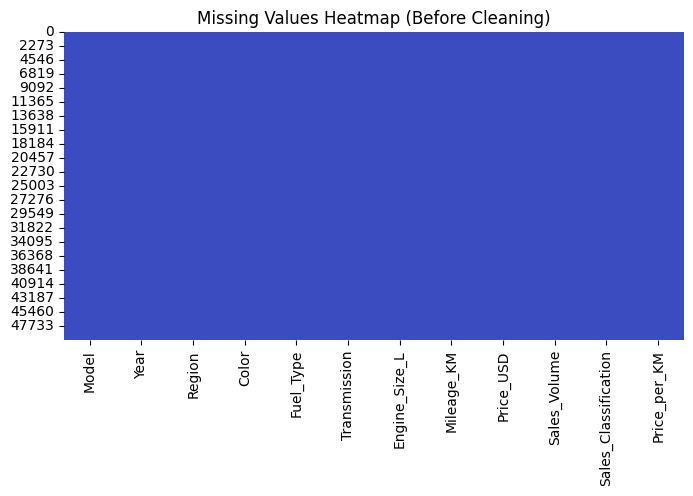

In [7]:
# Visualization of missing values
plt.figure(figsize=(8,4))
sns.heatmap(sayem.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap (Before Cleaning)")
plt.show()

In [8]:
# Fill missing values
# Numeric columns → fill with mean
# Categorical columns → fill with mode
for col in sayem.columns:
    if sayem[col].dtype == 'object':
        sayem[col].fillna(sayem[col].mode()[0], inplace=True)
    else:
        sayem[col].fillna(sayem[col].mean(), inplace=True)

/tmp/ipython-input-3224127323.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sayem[col].fillna(sayem[col].mode()[0], inplace=True)
/tmp/ipython-input-3224127323.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [9]:
print("\n Missing Values After Filling:")
print(sayem.isnull().sum())


 Missing Values After Filling:
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
Price_per_KM            0
dtype: int64


In [10]:
# Check for duplicate records
duplicates = sayem.duplicated().sum()
print(f"\n Total duplicate rows found: {duplicates}")


 Total duplicate rows found: 0


In [11]:
# Remove duplicates
sayem.drop_duplicates(inplace=True)
print("Duplicates removed successfully.")

Duplicates removed successfully.


In [12]:
# Encode categorical columns
label_enc = LabelEncoder()
cat_cols = sayem.select_dtypes(include='object').columns
for col in cat_cols:
    sayem[col] = label_enc.fit_transform(sayem[col])

print("\n Encoded categorical columns:")
print(cat_cols.tolist())


 Encoded categorical columns:
['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']


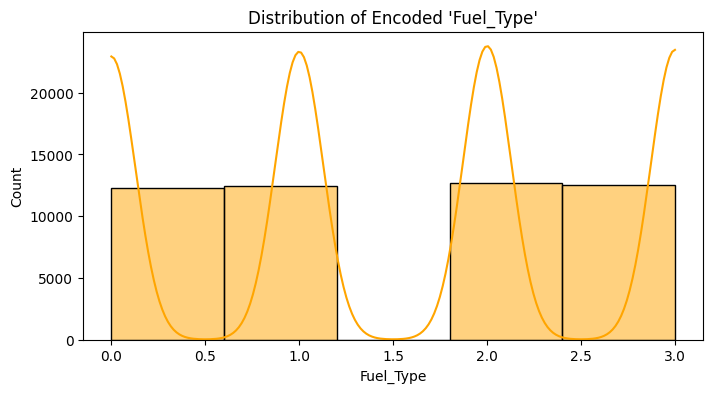

In [13]:
# Visualize encoded columns (distribution after encoding)
plt.figure(figsize=(8,4))
sns.histplot(sayem['Fuel_Type'], bins=5, color='orange', kde=True)
plt.title("Distribution of Encoded 'Fuel_Type'")
plt.show()

In [14]:
# Scale numerical features
scaler = StandardScaler()
num_cols = sayem.select_dtypes(include=np.number).columns

sayem[num_cols] = scaler.fit_transform(sayem[num_cols])

print("\n Numerical columns scaled successfully!")


 Numerical columns scaled successfully!


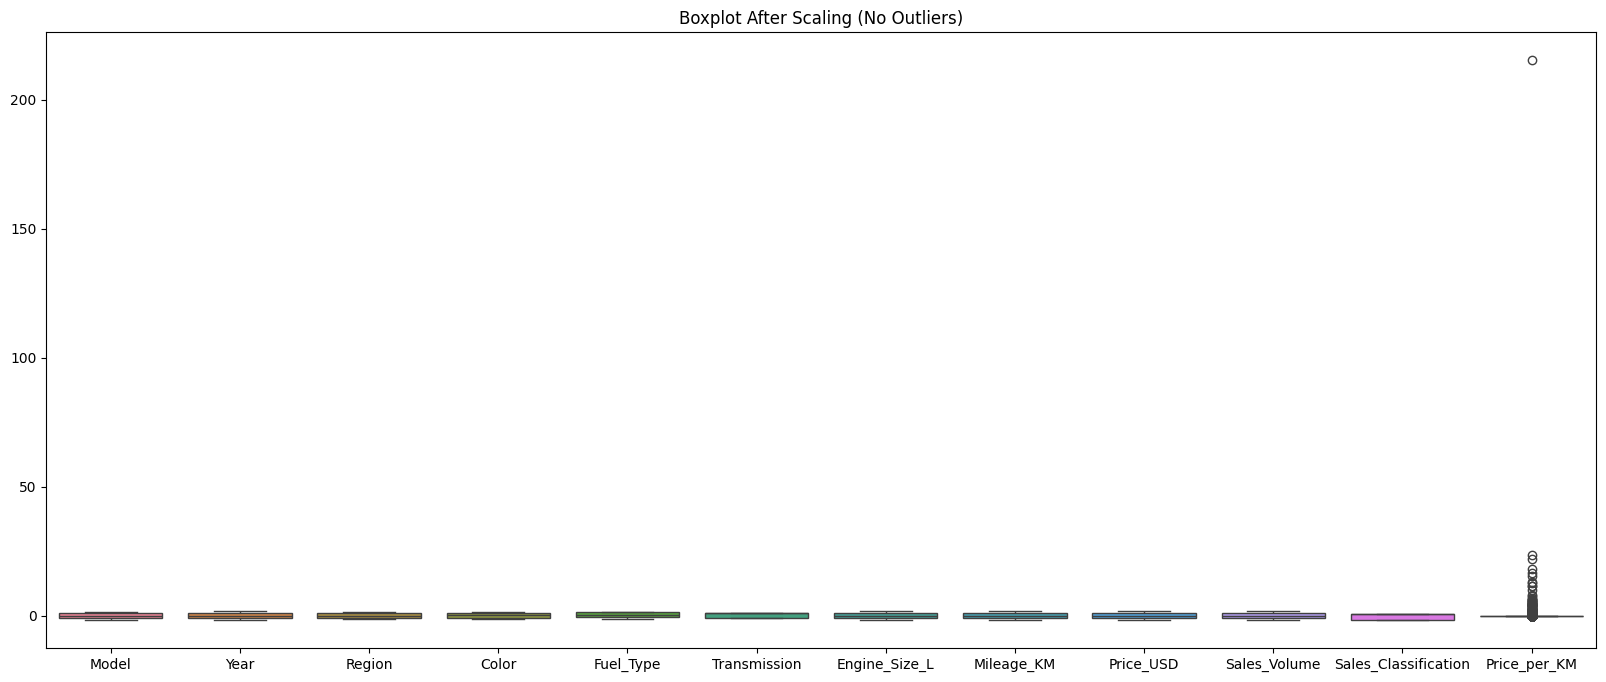

In [19]:
# Visualize effect of scaling (before vs after)
plt.figure(figsize=(20,8))
sns.boxplot(data=sayem[num_cols])
plt.title("Boxplot After Scaling (No Outliers)")
plt.show()

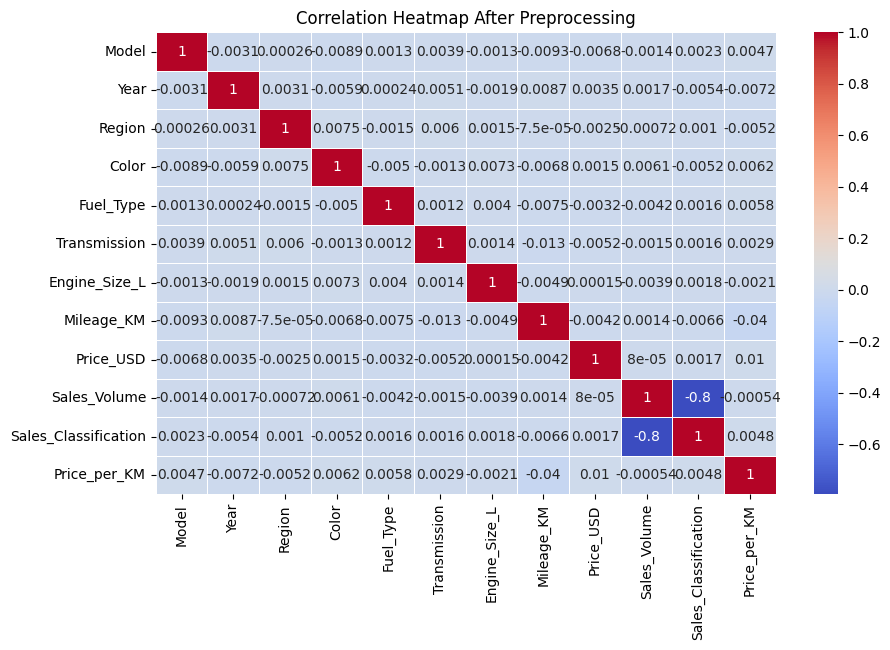

In [20]:
# Correlation Heatmap after preprocessing
plt.figure(figsize=(10,6))
sns.heatmap(sayem.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap After Preprocessing")
plt.show()

In [21]:
# Save the cleaned dataset
output_path = '/content/drive/MyDrive/bmw_preprocessed.csv'
sayem.to_csv(output_path, index=False)
print(f"\n Preprocessed dataset saved to: {output_path}")


 Preprocessed dataset saved to: /content/drive/MyDrive/bmw_preprocessed.csv
